# Homework 3

## FINM 37500: Fixed Income Derivatives

### Mark Hendricks

#### Winter 2025

#### Notation Commands

$$\newcommand{\cpn}{\text{c}}$$
$$\newcommand{\Tunder}{T_\text{bond}}$$
$$\newcommand{\accint}{\xi}$$
$$\newcommand{\convert}{\psi}$$
$$\newcommand{\ctd}{\text{ctd}}$$

$$\newcommand{\refrate}{r^{\text{ref}}}$$
$$\newcommand{\pfwd}{P_{\text{fwd}}}$$
$$\newcommand{\grossbasis}{B}$$
$$\newcommand{\netbasis}{\tilde{\grossbasis}}$$
$$\newcommand{\pnl}{\Pi}$$

$$\newcommand{\years}{\tau}$$
$$\newcommand{\yearsACT}{\years_{\text{act/360}}}$$

$$\newcommand{\fwdprice}{\mathcal{F}_{t\to T}}$$
$$\newcommand{\futprice}{F_{t\to T}}$$

$$\newcommand{\fwdpriceT}{\mathcal{F}_{T\to T}}$$
$$\newcommand{\futpriceT}{F_{T\to T}}$$

$$\newcommand{\fwdpriceDT}{\mathcal{F}_{t+h\to T}}$$
$$\newcommand{\futpriceDT}{F_{t+h\to T}}$$

$$\newcommand{\rrepo}{r^{\text{repo}}}$$
$$\newcommand{\carry}{\widetilde{\cpn}}$$

***

# 1. Trading Bonds

### Data

The file `data/fut_bond_data_TYZ4_2024-08-01.xlsx` has market data on the following:
* 10-year Treasury future, expiring December 2024
* The specifications of the deliverable treasury bonds

Suppose the present date is `2024-08-01`.

In [16]:
import pandas as pd

DATE = "2024-08-01"
fut_data = pd.read_excel(f"../../data/fut_bond_data_TYZ4_{DATE}.xlsx", sheet_name="future")
fut_data.set_index("field", inplace=True)

bond_data = pd.read_excel(f"../../data/fut_bond_data_TYZ4_{DATE}.xlsx", sheet_name="bonds")

In [17]:
fut_data

,TYZ4 Comdty
field,
last_update_dt,2024-08-02 00:00:00
px_last,114.234375
last_tradeable_dt,2024-12-19 00:00:00
fut_dlv_dt_last,2024-12-31 00:00:00
fut_days_expire,139
fut_ctd,T 4.25 06/30/31
fut_ctd_px,103.296875
fut_ctd_gross_basis,-9.67291
fut_ctd_net_basis,2.684063


In [18]:
bond_data

,ticker,last_update_dt,px_last,maturity,days_to_mty,dur_adj_mid,cpn,nxt_cpn_dt,days_to_next_coupon,int_acc,accrued_days_between_cpn_dates,days_acc,basis_mid,repo_implied_reporate,repo_reporate,conversion
0,91282CCS Govt,2024-08-02,84.843750,2031-08-15,2566,6.550426,1.250,2024-08-15,10,0.590659,182,172,46.253746,3.646209,5.375,0.7474
1,91282CDJ Govt,2024-08-02,85.062500,2031-11-15,2658,6.763513,1.375,2024-11-15,102,0.306386,184,82,55.779000,3.623413,5.375,0.7463
2,91282CDY Govt,2024-08-02,87.796875,2032-02-15,2750,6.816994,1.875,2024-08-15,10,0.885989,182,172,65.717750,3.675354,5.375,0.7670
3,91282CEP Govt,2024-08-02,94.078125,2032-05-15,2840,6.820612,2.875,2024-11-15,102,0.640625,184,82,75.048750,3.644107,5.375,0.8184
4,91282CFF Govt,2024-08-02,93.000000,2032-08-15,2932,6.990905,2.750,2024-08-15,10,1.299451,182,172,86.003250,3.692673,5.375,0.8060
5,91282CFV Govt,2024-08-02,102.531250,2032-11-15,3024,6.921134,4.125,2024-11-15,102,0.919158,184,82,NaN,3.649617,5.375,0.8851
6,91282CKW Govt,2024-08-02,103.296875,2031-06-30,2520,5.937053,4.250,2024-12-31,148,0.415761,184,36,43.819996,3.590292,5.375,0.9069
7,91282CLD Govt,2024-08-02,102.546875,2031-07-31,2551,6.038217,4.125,2025-01-31,179,0.056046,184,5,44.961746,3.594133,5.375,0.9003


### 1.1
For each bond, calculate the 
* gross basis
* carry
* net basis 

Your calculations will be more accurate if you consider that it takes time for any trade to "settle". Assume it takes one day.

#### Tip: Calculate Gross Basis using Conversion Factor

$$\underbrace{\grossbasis_{t,t+\tau}^i}_{\text{gross basis}}=\;  P_t^i - \convert^i\futprice$$

where $\convert$ denotes the **conversion factor** which is defined for each bond. You can find the conversion factor in the `conversion` column of the `bonds` sheet of the data.

Why the use of a conversion factor?
* The deliverable bonds differ in maturity and coupon, and thus range in value.
* To account for this, CBOT uses a **conversion factor** such that the futures price at delivery for bond $i$ is
$$\futpriceT\convert^i$$


#### Tip: Calculate Net Basis as Gross Basis Minus Carry

$$\begin{align*}
\text{net basis} \equiv \netbasis^i_{t,T} =& \grossbasis^i_{t,T} - \left(\cpn N - \rrepo P_t^{i,\text{dirty}}\right)\yearsACT\\
=& \grossbasis^i_{t,T} - \left[\cpn N - \rrepo \left(P_t^{i} + \accint_t^i\right)\right]\yearsACT
\end{align*}$$

recalling that
* $N$ denotes the notional, (here face value of 100)
* $\accint$ denotes accrued interest
* $\rrepo$ denotes the repo rate
* $\yearsACT$ denotes the time interval quoted as ACT/360

In [19]:
days_fwd = fut_data.loc["fut_days_expire"][0] - 1 
days_cpn_period = bond_data['accrued_days_between_cpn_dates']
days_already_accrued = bond_data['days_acc'] +1

future_price = fut_data.loc["px_last"][0]
cpn = bond_data['cpn']/100
repo = bond_data['repo_reporate']/100
px = bond_data['px_last']

face = 100

C:\Users\josel\AppData\Local\Temp\ipykernel_17088\3813892952.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  days_fwd = fut_data.loc["fut_days_expire"][0] - 1
C:\Users\josel\AppData\Local\Temp\ipykernel_17088\3813892952.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  future_price = fut_data.loc["px_last"][0]


In [20]:
int_already_acc = cpn*face/2 * (days_already_accrued / days_cpn_period)
pxdirty = px + int_already_acc

carry = ((face * cpn - repo * pxdirty) * days_fwd / 360).to_frame().rename(columns={0:'Carry'})
gross_basis = (px - future_price* bond_data['conversion']).to_frame().rename(columns={0:'dollars'})
gross_basis.columns = ['Gross basis']
net_basis =  gross_basis - carry.values
net_basis.columns.name = 'Net Basis'
# pd.concat([carry, gross_basis, net_basis], axis=1)

In [21]:
bond_data["Gross Basis"] = bond_data["px_last"] - bond_data["conversion"]*future_price
bond_data["Carry"] = (bond_data["cpn"] - (bond_data["repo_reporate"]/100)*(bond_data["px_last"] + bond_data["int_acc"]))*(days_fwd/360)
bond_data["Net Basis"] = bond_data["Gross Basis"] - bond_data["Carry"]

In [22]:
display(bond_data[["ticker", "Carry", "Gross Basis", "Net Basis"]])

,ticker,Carry,Gross Basis,Net Basis
0,91282CCS Govt,-1.281138,-0.535022,0.746116
1,91282CDJ Govt,-1.231871,-0.190614,1.041257
2,91282CDY Govt,-1.108487,0.179109,1.287596
3,91282CEP Govt,-0.849518,0.588712,1.438230
4,91282CFF Govt,-0.888795,0.927094,1.815889
5,91282CFV Govt,-0.550259,1.422405,1.972664
6,91282CKW Govt,-0.507746,-0.302280,0.205466
7,91282CLD Govt,-0.532798,-0.298333,0.234465


### 1.2.
If you were required to put on a position today
* long one of the bonds
* short the future

which would you choose based on the data provided in the spreadsheet?

*Answer :* I would pick the bond with the **lowest positive** net basis if I want to **buy the bond and short the future** 

In [52]:
bond_data.loc[bond_data["Net Basis"].idxmin(),["ticker", "Net Basis"]]

ticker       91282CKW Govt
Net Basis         0.205466
Name: 6, dtype: object

### 1.3.

Calculate the conversion factor for each bond. Report it to `6` decimal places.

Do they match the conversion factor provided by Bloomberg?


#### Tip: Calculating the Conversion Factor

CBOT calculates the conversion for any bond as the discounted cashflows of the bond, where every cashflow is discounted by 6\%.
* Yes, this conversion factor formula always uses 6\%, regardless of actual interest rates.

In [37]:
def price_bond(ytm, T, cpn, cpnfreq=2, face=100, accr_frac=None):
    ytm_n = ytm/cpnfreq
    cpn_n = cpn/cpnfreq
    
    if accr_frac is None:
        #accr_frac = 1 - (T-round(T))*cpnfreq        
        accr_frac = 0

    if cpn==0:
        accr_frac = 0
        
    N = T * cpnfreq
    price = face * ((cpn_n / ytm_n) * (1-(1+ytm_n)**(-N)) + (1+ytm_n)**(-N)) * (1+ytm_n)**(accr_frac)
    return price


In [42]:
fut_data.loc['fut_days_expire'].values[0]

139

In [43]:
bond_data["time_to_maturity"] = (bond_data['days_to_mty']-fut_data.loc['fut_days_expire'].values[0])/365
ytm = 0.06



for i in range(len(bond_data)):
    bond_data.loc[i,"Est_Conversion_Factor"] = price_bond(T = bond_data.loc[i,"time_to_maturity"], cpn = bond_data.loc[i,"cpn"]/100, ytm = 0.06, face=1)

In [44]:
bond_data["Diff_Conversion_Factor"] = bond_data["conversion"] - bond_data["Est_Conversion_Factor"]
bond_data[["conversion", "Est_Conversion_Factor", "Diff_Conversion_Factor"]].style.format("{:.6f}")

,conversion,Est_Conversion_Factor,Diff_Conversion_Factor
0,0.747400,0.742682,0.004718
1,0.746300,0.741758,0.004542
2,0.767000,0.762915,0.004085
3,0.818400,0.815452,0.002948
4,0.806000,0.802897,0.003103
5,0.885100,0.883347,0.001753
6,0.906900,0.906671,0.000229
7,0.900300,0.898940,0.001360


### 1.4 

Calculate the forward price of each bond.

Use the forward prices to do an alternate calculation of net basis, using the formula in the discussion notebook.

Does this calculation agree with the net basis calculation which used gross basis minus carry?


#### Calculate net basis using forward price 

Net basis is also calculated with the same formula as gross basis, but replacing the spot price with the forward price:

$$\text{net basis} \equiv \netbasis^i_{t,T} = \fwdprice^i - \futprice\convert^i$$

recalling that
* $\fwdprice$ denotes the forward price
* $\futprice$ denotes the futures price
* $\convert$ denotes the bond's conversion factor

As we saw in Week 2, no-arbitrage (and frictionless markets) would imply the forward price is exactly the spot price minus carry, in which case this definition would match.

### Forward Price

The forward price is given by the no-arbitrage relationship:

$$\begin{align*}
\text{dirty} \fwdprice =& (P_t^i + \accint_t^i)\left(1+\rrepo_t\, \yearsACT\right)\\
\fwdprice =& (P_t^i + \accint^i_t)\left(1+\rrepo_t\, \yearsACT\right) - \accint_T
\end{align*}$$


#### With interim coupons
If there are interim coupons, the no-arbitrage relationship still holds,
* buy the bond at the dirty price
* simultaneously repo it
* when the coupon pays, use it to reduce the repo balance
* finally, at the terminal date, close out the repo

$$\begin{align*}
\text{dirty} \fwdprice =& \left[(P_t^i + \accint_t)\left(1+\rrepo_t\, \tau_0\right)-100\frac{\cpn}{2}\right]\left(1+\rrepo_t\, \tau_1\right)\\
\fwdprice =& \left[(P^i_t + \accint^i_t)\left(1+\rrepo_t\, \tau_0\right)-100\frac{\cpn}{2}\right]\left(1+\rrepo_t\, \tau_1\right) - \accint^i_T
\end{align*}$$
where
* $\tau_0$ denotes the pre-coupon forward interval, $t_{\text{coupon}}-t$ denoted as ACT/360
* $\tau_1$ denotes the pre-coupon forward interval, $T-t_{\text{coupon}}$ denoted as ACT/360
* note that $\tau=\tau_0+\tau_1$, so the formula is simply splitting the forward interval into pre and post-coupon intervals.

In [51]:
 bond_data["days_to_next_coupon"]

0     10
1    102
2     10
3    102
4     10
5    102
6    148
7    179
Name: days_to_next_coupon, dtype: int64

In [ ]:
t0 = bond_data["days_to_next_coupon"]/360
t1 = (days_fwd - bond_data["days_to_next_coupon"])/360
dirty_price = bond_data["px_last"] + bond_data["int_acc"]
fwd_price = (dirty_price*(1 + repo*t0/360) - 100*cpn/2)*(1 + repo*t1) - bond_data["int_acc"]
bond_data["Fwd_Price"] = fwd_price
bond_data["Net_Basis_with_Fwd"] = bond_data["Fwd_Price"] - bond_data["conversion"]*future_price

In [55]:
bond_data[["ticker", "Net Basis" ,"Net_Basis_with_Fwd"]]

,ticker,Net Basis,Net_Basis_with_Fwd
0,91282CCS Govt,0.746116,0.461141
1,91282CDJ Govt,1.041257,-0.419321
2,91282CDY Govt,1.287596,0.918896
3,91282CEP Govt,1.438230,-0.343372
4,91282CFF Govt,1.815889,1.328382
5,91282CFV Govt,1.972664,-0.090735
6,91282CKW Govt,0.205466,-2.572599
7,91282CLD Govt,0.234465,-2.968723


***

# 2. Fed Funds Futures

The file `data/fedfutures_2025-01-31.xlsx` has market data on the following:
* Fed Fund Futures Chain out 18 months.
* Dates of upcoming Fed meetings (approximated in 2026.)
* Spot Fed Funds data
* Prices of the futures chain on a historic date.

Suppose the present date is `2024-01-31`.

In [ ]:
import matplotlib.pyplot as plt

DATE = "2025-01-31"
FF_Futures_01_31 = pd.read_excel(f"../../data/fedfutures_{DATE}.xlsx", sheet_name=DATE)
FF_Futures_01_31.set_index("last_tradeable_dt", inplace=True)

FF_Futures_01_26 = pd.read_excel(f"../../data/fedfutures_{DATE}.xlsx", sheet_name="2025-01-26")
FF_Futures_01_26.set_index("last_tradeable_dt", inplace=True)

FF_Futures_2024_07_29 = pd.read_excel(f"../../data/fedfutures_{DATE}.xlsx", sheet_name="2024-07-29")
FF_Futures_2024_07_29.set_index("last_tradeable_dt", inplace=True)

Fed_rates = pd.read_excel(f"../../data/fedfutures_{DATE}.xlsx", sheet_name="fed funds")
Fed_rates.set_index("date", inplace=True)
Fed_meetings = pd.read_excel(f"../../data/fedfutures_{DATE}.xlsx", sheet_name="fed meetings")
Fed_meetings["meeting dates"] = pd.to_datetime(Fed_meetings["meeting dates"])


### 2.1. Chart the Fed Futures Rates

Chart the Fed Funds curve at
* `2025-01-26`
* `2025-01-31`

Note that you are charting the implied Fed Funds Futures *rate*, not price.

Comment on how today's **open interest** varies across the chain.

In [194]:
FF_Futures_01_31["Rate_01_31"] = 100 - FF_Futures_01_31["px_last"]
FF_Futures_01_26["Rate_01_26"] = 100 - FF_Futures_01_26["px_last"]
FF_Futures_2024_07_29["Rate_2024_07_29"] = 100 - FF_Futures_2024_07_29["px_last"]

FF_Futures_01_31.loc["2025-01-31", "Rate_01_31"] = Fed_rates.loc["2025-01-31", "fed funds rate"]
FF_Futures_01_26.loc["2025-01-26", "Rate_01_26"] = Fed_rates.loc["2025-01-26", "fed funds rate"]
FF_Futures_2024_07_29.loc["2024-07-29", "Rate_2024_07_29"] = Fed_rates.loc["2024-07-29", "fed funds rate"]

FF_Futures_01_31.sort_index(inplace=True)
FF_Futures_01_26.sort_index(inplace=True)
FF_Futures_2024_07_29.sort_index(inplace=True)

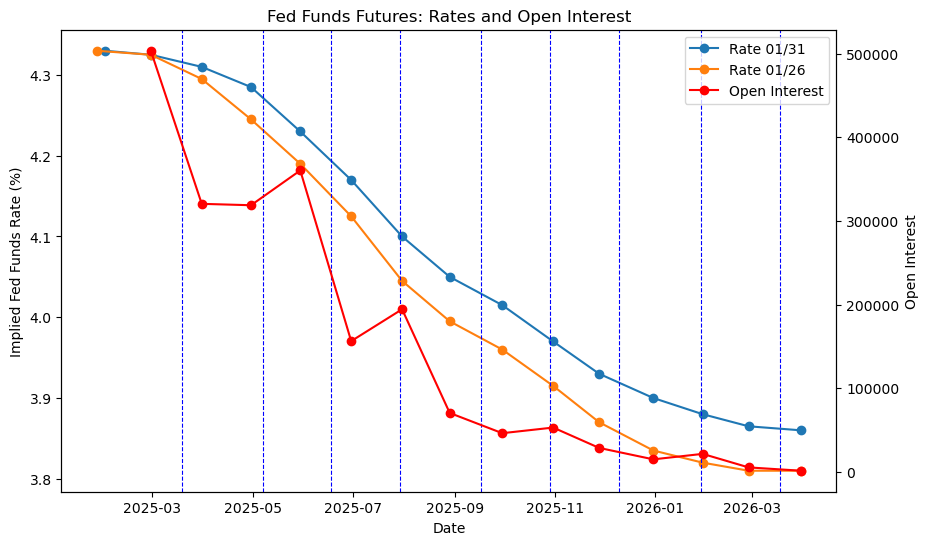

In [227]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

ax1.plot(FF_Futures_01_31.index, FF_Futures_01_31["Rate_01_31"], marker="o", label="Rate 01/31")
ax1.plot(FF_Futures_01_26.index, FF_Futures_01_26["Rate_01_26"], marker="o", label="Rate 01/26")
ax2.plot(FF_Futures_01_31.index, FF_Futures_01_31["open_int"], marker="o", color='r', label="Open Interest")

# Add vertical lines for Fed meeting dates
for meeting_date in Fed_meetings["meeting dates"]:
    ax1.axvline(meeting_date, color='b', linestyle='--', linewidth=0.8)

ax1.set_xlabel("Date")
ax1.set_ylabel("Implied Fed Funds Rate (%)")
ax2.set_ylabel("Open Interest")
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.title("Fed Funds Futures: Rates and Open Interest")
plt.show()

The open interest is higher for the earliest contract, presenting peaks across different dates that could be related with the Fed Meeting

### 2.2 Extracting the Expected Path of Fed Funds Rates

Assume the Fed...
* sets the rate exactly at its list of meeting dates.
* does not change the rate betweeen meeting dates.

Use the present data to calculate--and plot--the implied set of expected Fed Funds rates as of each meeting date.

#### Technical Point
* Consider months, $t$, where there is a meeting, but such that in month $t+1$ there is no meeting.
* There will be two reasonable ways to extract the expected fed funds rate:
    1. Use the futures rate from the $t+1$-contract
    2. Calculate the implied rate for the remainder of month $t$, knowing the expected rate at the end of month $t+1$.
* These are both reasonable and will likely not differ much.

Try to make reasonable assumptions as needed. to implement the calculation.

Expected Fed Funds Path:
  meeting_date  expected_rate
0   2025-03-19          4.310
1   2025-05-07          4.230
2   2025-06-18          4.170
3   2025-07-30          4.100
4   2025-09-17          4.015
5   2025-10-29          3.970
6   2025-12-10          3.900
7   2026-01-29          3.880
8   2026-03-18          3.860


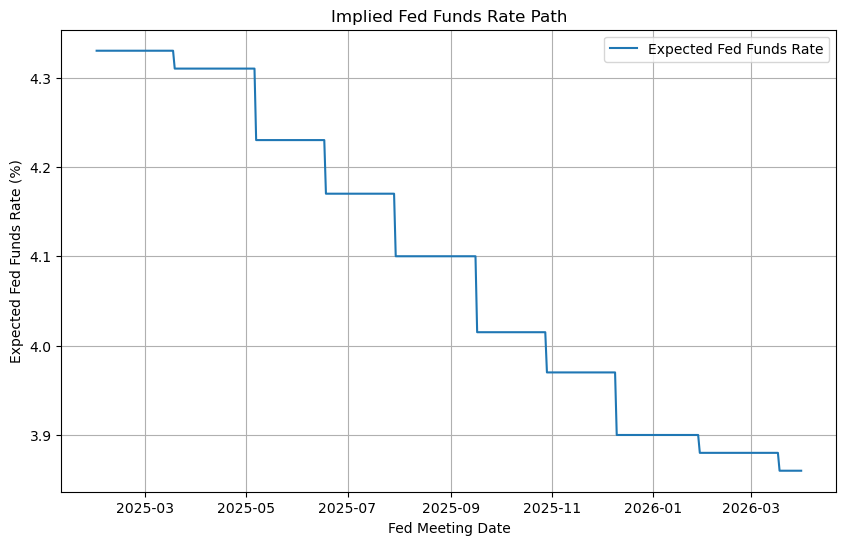

In [219]:
FF_Futures_01_31.index = pd.to_datetime(FF_Futures_01_31.index)
dates = pd.date_range(start=FF_Futures_01_31.index.min(), end=FF_Futures_01_31.index.max(), freq='D')

expected_rates = []
for mdate in sorted(Fed_meetings["meeting dates"]):
    future_contracts = FF_Futures_01_31[FF_Futures_01_31.index > mdate]
    if not future_contracts.empty:
        selected_date = future_contracts.index[0]
        rate = future_contracts.loc[selected_date, "Rate_01_31"]
    else:
        rate = None  
    expected_rates.append({"meeting_date": mdate, "expected_rate": rate})

expected_path = pd.DataFrame(expected_rates)
expected_path.set_index("meeting_date", inplace=True)
expected_path.loc["2025-01-31", "expected_rate"] = Fed_rates.loc["2025-01-31", "fed funds rate"]
expected_path.sort_index(inplace=True)
expected_path = expected_path.reindex(dates, method='ffill')

print("Expected Fed Funds Path:")
print(pd.DataFrame(expected_rates))

plt.figure(figsize=(10,6))
plt.plot(expected_path.index, expected_path["expected_rate"], label="Expected Fed Funds Rate")
plt.xlabel("Fed Meeting Date")
plt.ylabel("Expected Fed Funds Rate (%)")
plt.title("Implied Fed Funds Rate Path")
plt.grid(True)
plt.legend()
plt.show()


### 2.3 Compare to the Historic Curve

Use the price data in `2024` to extract the expectations at the previous date.
* Note that you do not need to "bootstrap" up from the historic date to the current date. 

Compare this to the answer in the previous problem, for the current data.

Historic Expected Fed Funds Path:
  meeting_date  expected_rate
0   2025-03-19          4.400
1   2025-05-07          4.135
2   2025-06-18          4.030
3   2025-07-30          3.955
4   2025-09-17          3.805
5   2025-10-29            NaN
6   2025-12-10            NaN
7   2026-01-29            NaN
8   2026-03-18            NaN


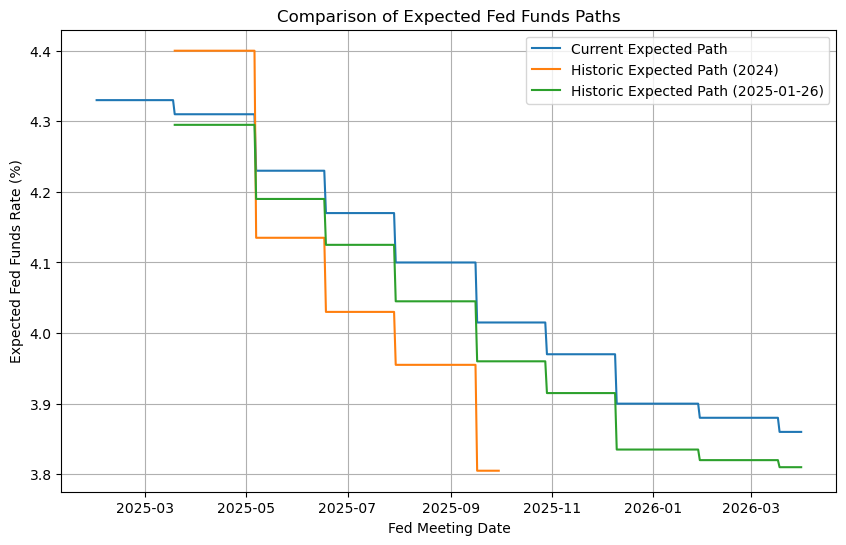

In [225]:
FF_Futures_2024_07_29.index = pd.to_datetime(FF_Futures_2024_07_29.index)
dates_hist = pd.date_range(start=FF_Futures_2024_07_29.index.min(), end=FF_Futures_2024_07_29.index.max(), freq='D')

historic_expected_rates = []
for mdate in sorted(Fed_meetings["meeting dates"]):
    future_contracts_hist = FF_Futures_2024_07_29[FF_Futures_2024_07_29.index > mdate]
    if not future_contracts_hist.empty:
        selected_date_hist = future_contracts_hist.index[0]
        rate_hist = future_contracts_hist.loc[selected_date_hist, "Rate_2024_07_29"]
    else:
        rate_hist = None  
    historic_expected_rates.append({"meeting_date": mdate, "expected_rate": rate_hist})

historic_expected_path = pd.DataFrame(historic_expected_rates)
historic_expected_path.set_index("meeting_date", inplace=True)
historic_expected_path.sort_index(inplace=True)
historic_expected_path = historic_expected_path.reindex(dates_hist, method='ffill')

FF_Futures_01_26.index = pd.to_datetime(FF_Futures_01_26.index)
dates_hist_01_26 = pd.date_range(start=FF_Futures_01_26.index.min(), end=FF_Futures_01_26.index.max(), freq='D')

historic_expected_rates_01_26 = []
for mdate in sorted(Fed_meetings["meeting dates"]):
    future_contracts_hist_01_26 = FF_Futures_01_26[FF_Futures_01_26.index > mdate]
    if not future_contracts_hist_01_26.empty:
        selected_date_hist_01_26 = future_contracts_hist_01_26.index[0]
        rate_hist_01_26 = future_contracts_hist_01_26.loc[selected_date_hist_01_26, "Rate_01_26"]
    else:
        rate_hist_01_26 = None  
    historic_expected_rates_01_26.append({"meeting_date": mdate, "expected_rate": rate_hist_01_26})

historic_expected_path_01_26 = pd.DataFrame(historic_expected_rates_01_26)
historic_expected_path_01_26.set_index("meeting_date", inplace=True)
historic_expected_path_01_26.sort_index(inplace=True)
historic_expected_path_01_26 = historic_expected_path_01_26.reindex(dates_hist_01_26, method='ffill')

print("Historic Expected Fed Funds Path:")
print(pd.DataFrame(historic_expected_rates))

plt.figure(figsize=(10,6))
plt.plot(expected_path.index, expected_path["expected_rate"],
          label="Current Expected Path")
plt.plot(historic_expected_path.index, historic_expected_path["expected_rate"],
          label="Historic Expected Path (2024)")
plt.plot(historic_expected_path_01_26.index, historic_expected_path_01_26["expected_rate"],
          label="Historic Expected Path (2025-01-26)")
plt.xlabel("Fed Meeting Date")
plt.ylabel("Expected Fed Funds Rate (%)")
plt.title("Comparison of Expected Fed Funds Paths")
plt.grid(True)
plt.legend()
plt.show()


***